In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv("/content/drive/My Drive/Data Analysts/Data Covid19.csv")
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,1/22/2020 17:00,444,17,28
1,Hubei,Mainland China,1/23/20 17:00,444,17,28
2,Hubei,Mainland China,1/23/20 17:00,444,17,28
3,Hubei,Mainland China,1/24/20 17:00,549,24,31
4,Hubei,Mainland China,1/25/20 17:00,761,40,32


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114358 entries, 0 to 114357
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Province/State  114358 non-null  object
 1   Country/Region  114358 non-null  object
 2   Last Update     114358 non-null  object
 3   Confirmed       114358 non-null  int64 
 4   Deaths          114358 non-null  int64 
 5   Recovered       114358 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.2+ MB


In [8]:
data['Last Update'].unique()

array(['1/22/2020 17:00', '1/23/20 17:00', '1/24/20 17:00', ...,
       '26/02/2021 05.22', '27/02/2021 05.22', '28/02/2021 05.22'],
      dtype=object)

In [9]:
latest_date = '28/02/2021 05.22'
data[data['Last Update']==latest_date]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
113959,Abruzzo,Italy,28/02/2021 05.22,53900,1698,39479
113960,Acre,Brazil,28/02/2021 05.22,57337,996,46623
113961,Adygea Republic,Russia,28/02/2021 05.22,13772,149,12159
113962,Aichi,Japan,28/02/2021 05.22,25858,515,24524
113963,Akita,Japan,28/02/2021 05.22,269,6,260
...,...,...,...,...,...,...
114353,Zabaykalsky Krai,Russia,28/02/2021 05.22,38523,528,36849
114354,Zakarpattia Oblast,Ukraine,28/02/2021 05.22,39830,900,30516
114355,Zaporizhia Oblast,Ukraine,28/02/2021 05.22,69504,1132,65049
114356,Zhejiang,Mainland China,28/02/2021 05.22,1321,1,1314


In [10]:
unique_countries = data[data.Confirmed>0]['Country/Region'].unique()
unique_countries.sort()
unique_countries

array(['Australia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Denmark',
       'France', 'Germany', 'Hong Kong', 'India', 'Italy', 'Japan',
       'Mainland China', 'Mexico', 'Netherlands', 'Others', 'Pakistan',
       'Peru', 'Russia', 'Spain', 'Taiwan', 'UK', 'US', 'Ukraine'],
      dtype=object)

In [11]:
unique_countries2 = data[data.Deaths>0]['Country/Region'].unique()
unique_countries2.sort()
unique_countries2

array(['Australia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Denmark',
       'France', 'Germany', 'Hong Kong', 'India', 'Italy', 'Japan',
       'Mainland China', 'Mexico', 'Netherlands', 'Others', 'Pakistan',
       'Peru', 'Russia', 'Spain', 'Taiwan', 'UK', 'US', 'Ukraine'],
      dtype=object)

In [12]:
country_confirmed_case = []
for i in unique_countries:
  country_confirmed_case.append(data[data.Confirmed>0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
country_deaths_case = []
for i in unique_countries2:
  country_deaths_case.append(data[data.Deaths>0][data['Country/Region']==i][data['Last Update']==latest_date].Deaths.sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Taiwan', 0), ('France', 83122), ('Hong Kong', 10983), ('Netherlands', 14854), ('Others', 0), ('Mainland China', 88855), ('Canada', 869154), ('Spain', 3188553), ('Ukraine', 1389570), ('Pakistan', 579973), ('Brazil', 10517232), ('Japan', 430795), ('Mexico', 0), ('Chile', 821418), ('Denmark', 658), ('Colombia', 2248135), ('Russia', 4187166), ('Germany', 2442582), ('US', 0), ('Italy', 2907825), ('Australia', 23688), ('India', 11096731), ('Peru', 7500), ('UK', 12177)}


In [22]:
print(set(zip(unique_countries2, country_deaths_case)))

{('Ukraine', 27306), ('Russia', 84330), ('Taiwan', 0), ('Hong Kong', 198), ('Others', 0), ('Peru', 205), ('Mainland China', 4636), ('Pakistan', 12860), ('Australia', 855), ('Denmark', 1), ('Germany', 70092), ('Spain', 69142), ('Italy', 97507), ('Mexico', 0), ('UK', 234), ('Netherlands', 125), ('France', 600), ('India', 157051), ('Brazil', 254221), ('Colombia', 59660), ('Canada', 21960), ('US', 0), ('Chile', 20476), ('Japan', 7859)}


In [16]:
unique_provinces = data['Province/State'][data.Confirmed>1].unique()
unique_provinces

array(['Hubei', 'Shanghai', 'Beijing', 'Henan', 'Sichuan', 'Hainan',
       'Chongqing', 'Heilongjiang', 'Hebei', 'Tianjin', 'Guizhou',
       'Guangdong', 'Jilin', 'Hunan', 'Gansu', 'Anhui', 'Shandong',
       'Guangxi', 'Jiangxi', 'Liaoning', 'Hong Kong', 'Xinjiang',
       'Taiwan', 'Yunnan', 'Zhejiang', 'Diamond Princess cruise ship',
       'Fujian', 'Shaanxi', 'Seattle, WA', 'King County, WA',
       'Inner Mongolia', 'New South Wales', 'British Columbia',
       'Washington', 'California', 'France', 'UK', 'United Kingdom',
       'Denmark', 'Netherlands', 'New Jersey', 'Kentucky', 'Ontario',
       'Illinois', 'Western Australia', 'French Polynesia', 'Curacao',
       'Queensland', 'Victoria', 'Guadeloupe',
       'Australian Capital Territory', 'St Martin', 'Martinique',
       'Mayotte', 'Tasmania', 'Sint Maarten', 'Channel Islands',
       'Cayman Islands', 'Bermuda', 'Isle of Man', 'South Australia',
       'Aruba', 'British Virgin Islands', 'French Guiana',
       'Turks an

In [17]:
unique_provinces2 = data['Province/State'][data.Deaths>1].unique()
unique_provinces2

array(['Hubei', 'Henan', 'Heilongjiang', 'Chongqing', 'Hainan', 'Beijing',
       'Hebei', 'Gansu', 'Anhui', 'Tianjin', 'Hunan', 'Shandong',
       'Guangdong', 'Guangxi', 'Sichuan', 'Guizhou', 'Shanghai',
       'Hong Kong', 'Diamond Princess cruise ship', 'Yunnan', 'Xinjiang',
       'King County, WA', 'New South Wales', 'Washington', 'California',
       'France', 'UK', 'Shaanxi', 'United Kingdom', 'Denmark',
       'Netherlands', 'New Jersey', 'British Columbia', 'Ontario',
       'Liaoning', 'French Polynesia', 'Victoria', 'Western Australia',
       'Guadeloupe', 'Queensland', 'Martinique', 'Tasmania',
       'Channel Islands', 'Mayotte', 'Sint Maarten',
       'Australian Capital Territory', 'St Martin', 'Bermuda',
       'South Australia', 'Isle of Man', 'Aruba', 'Abruzzo', 'Alberta',
       'Andalusia', 'Aragon', 'Asturias', 'Baden-Wurttemberg', 'Baleares',
       'Basilicata', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'C. Valenciana', 'Calabria', 'Campania', 'Canari

In [18]:
province_confirmed_case = []
for i in unique_provinces:
  province_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
province_deaths_case = []
for i in unique_provinces2:
  province_deaths_case.append(data[data.Deaths>0][data['Province/State']==i][data['Last Update']==latest_date].Deaths.sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
print(set(zip(unique_provinces, province_confirmed_case)))

{('Sonora', 0), ('Taiwan', 0), ('Saitama', 29292), ('Arica y Parinacota', 15098), ('California', 0), ('Navarra', 51244), ('Yucatan', 0), ('Montserrat', 20), ('Paraiba', 219723), ('Volyn Oblast', 39901), ('Penza Oblast', 38139), ('Santa Catarina', 668811), ('Guainia', 1304), ('Cordoba', 37070), ('Sint Maarten', 2055), ('Victoria', 20481), ('Stavropol Krai', 47228), ('Odessa Oblast', 85748), ('Netherlands', 0), ('Gujarat', 269482), ('Kaluga Oblast', 29707), ('Bryansk Oblast', 32795), ('Ladakh', 9818), ('Murmansk Oblast', 46677), ('Thuringen', 76291), ('Distrito Federal', 295615), ('Puebla', 0), ('Reunion', 12416), ('Tlaxcala', 0), ('Yamanashi', 941), ('Kurgan Oblast', 17569), ('Sikkim', 6137), ('Faroe Islands', 658), ('Queensland', 1329), ('Moscow', 976739), ('Boyaca', 46059), ('Arkhangelsk Oblast', 56537), ('Nizhny Novgorod Oblast', 96182), ('Liaoning', 406), ('Los Lagos', 51254), ('King County, WA', 0), ('Bayern', 436473), ('Quebec', 287003), ('Andalusia', 476822), ('Donetsk Oblast', 4

In [21]:
print(set(zip(unique_provinces2, province_deaths_case)))

{('Sonora', 0), ('Santander', 3306), ('Karelia Republic', 303), ('Guangdong', 8), ('Kaliningrad Oblast', 253), ('California', 0), ('Yucatan', 0), ('Fukui', 25), ('Pernambuco', 10974), ('Aragon', 3258), ('Huila', 1725), ('Castilla - La Mancha', 5588), ('Netherlands', 0), ('Luhansk Oblast', 460), ('Niedersachsen', 4296), ('Voronezh Oblast', 1903), ('Ontario', 6960), ('Madhya Pradesh', 3863), ('Quindio', 951), ('La Guajira', 634), ('Metropolitana', 11959), ('Tomsk Oblast', 313), ('Cauca', 748), ('Puebla', 0), ('Santa Catarina', 7314), ('Tlaxcala', 0), ('Catalonia', 10575), ('Narino', 1607), ('Cayman Islands', 2), ('Tula Oblast', 1251), ('Bermuda', 12), ('Meghalaya', 148), ('Chuvashia Republic', 1028), ('Galicia', 2194), ('Tochigi', 67), ('King County, WA', 0), ('French Polynesia', 139), ('Chandigarh', 351), ('Rivne Oblast', 619), ('Australian Capital Territory', 3), ('Tottori', 2), ('Michoacan', 0), ('Vaupes', 13), ('Odessa Oblast', 1429), ('Caqueta', 632), ('Liaoning', 2), ('Kalmykia Rep

In [23]:
nan_indices = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i) 

In [24]:
unique_provinces = list(unique_provinces)
province_confirmed_case = list(province_confirmed_case)

In [25]:
for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_case.pop(i)

unique_provinces

['Hubei',
 'Shanghai',
 'Beijing',
 'Henan',
 'Sichuan',
 'Hainan',
 'Chongqing',
 'Heilongjiang',
 'Hebei',
 'Tianjin',
 'Guizhou',
 'Guangdong',
 'Jilin',
 'Hunan',
 'Gansu',
 'Anhui',
 'Shandong',
 'Guangxi',
 'Jiangxi',
 'Liaoning',
 'Hong Kong',
 'Xinjiang',
 'Taiwan',
 'Yunnan',
 'Zhejiang',
 'Diamond Princess cruise ship',
 'Fujian',
 'Shaanxi',
 'Seattle, WA',
 'King County, WA',
 'Inner Mongolia',
 'New South Wales',
 'British Columbia',
 'Washington',
 'California',
 'France',
 'UK',
 'United Kingdom',
 'Denmark',
 'Netherlands',
 'New Jersey',
 'Kentucky',
 'Ontario',
 'Illinois',
 'Western Australia',
 'French Polynesia',
 'Curacao',
 'Queensland',
 'Victoria',
 'Guadeloupe',
 'Australian Capital Territory',
 'St Martin',
 'Martinique',
 'Mayotte',
 'Tasmania',
 'Sint Maarten',
 'Channel Islands',
 'Cayman Islands',
 'Bermuda',
 'Isle of Man',
 'South Australia',
 'Aruba',
 'British Virgin Islands',
 'French Guiana',
 'Turks and Caicos Islands',
 'Montserrat',
 'Abruzzo',
 

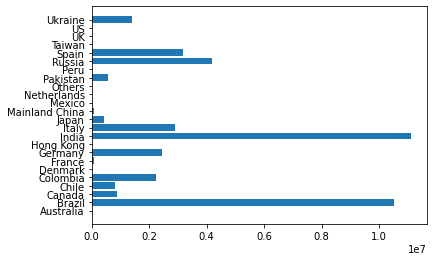

In [26]:
plt.barh(unique_countries, country_confirmed_case)
plt.show()

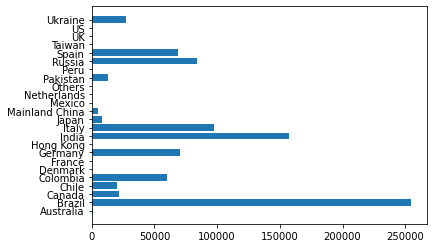

In [27]:
plt.barh(unique_countries2, country_deaths_case)
plt.show()

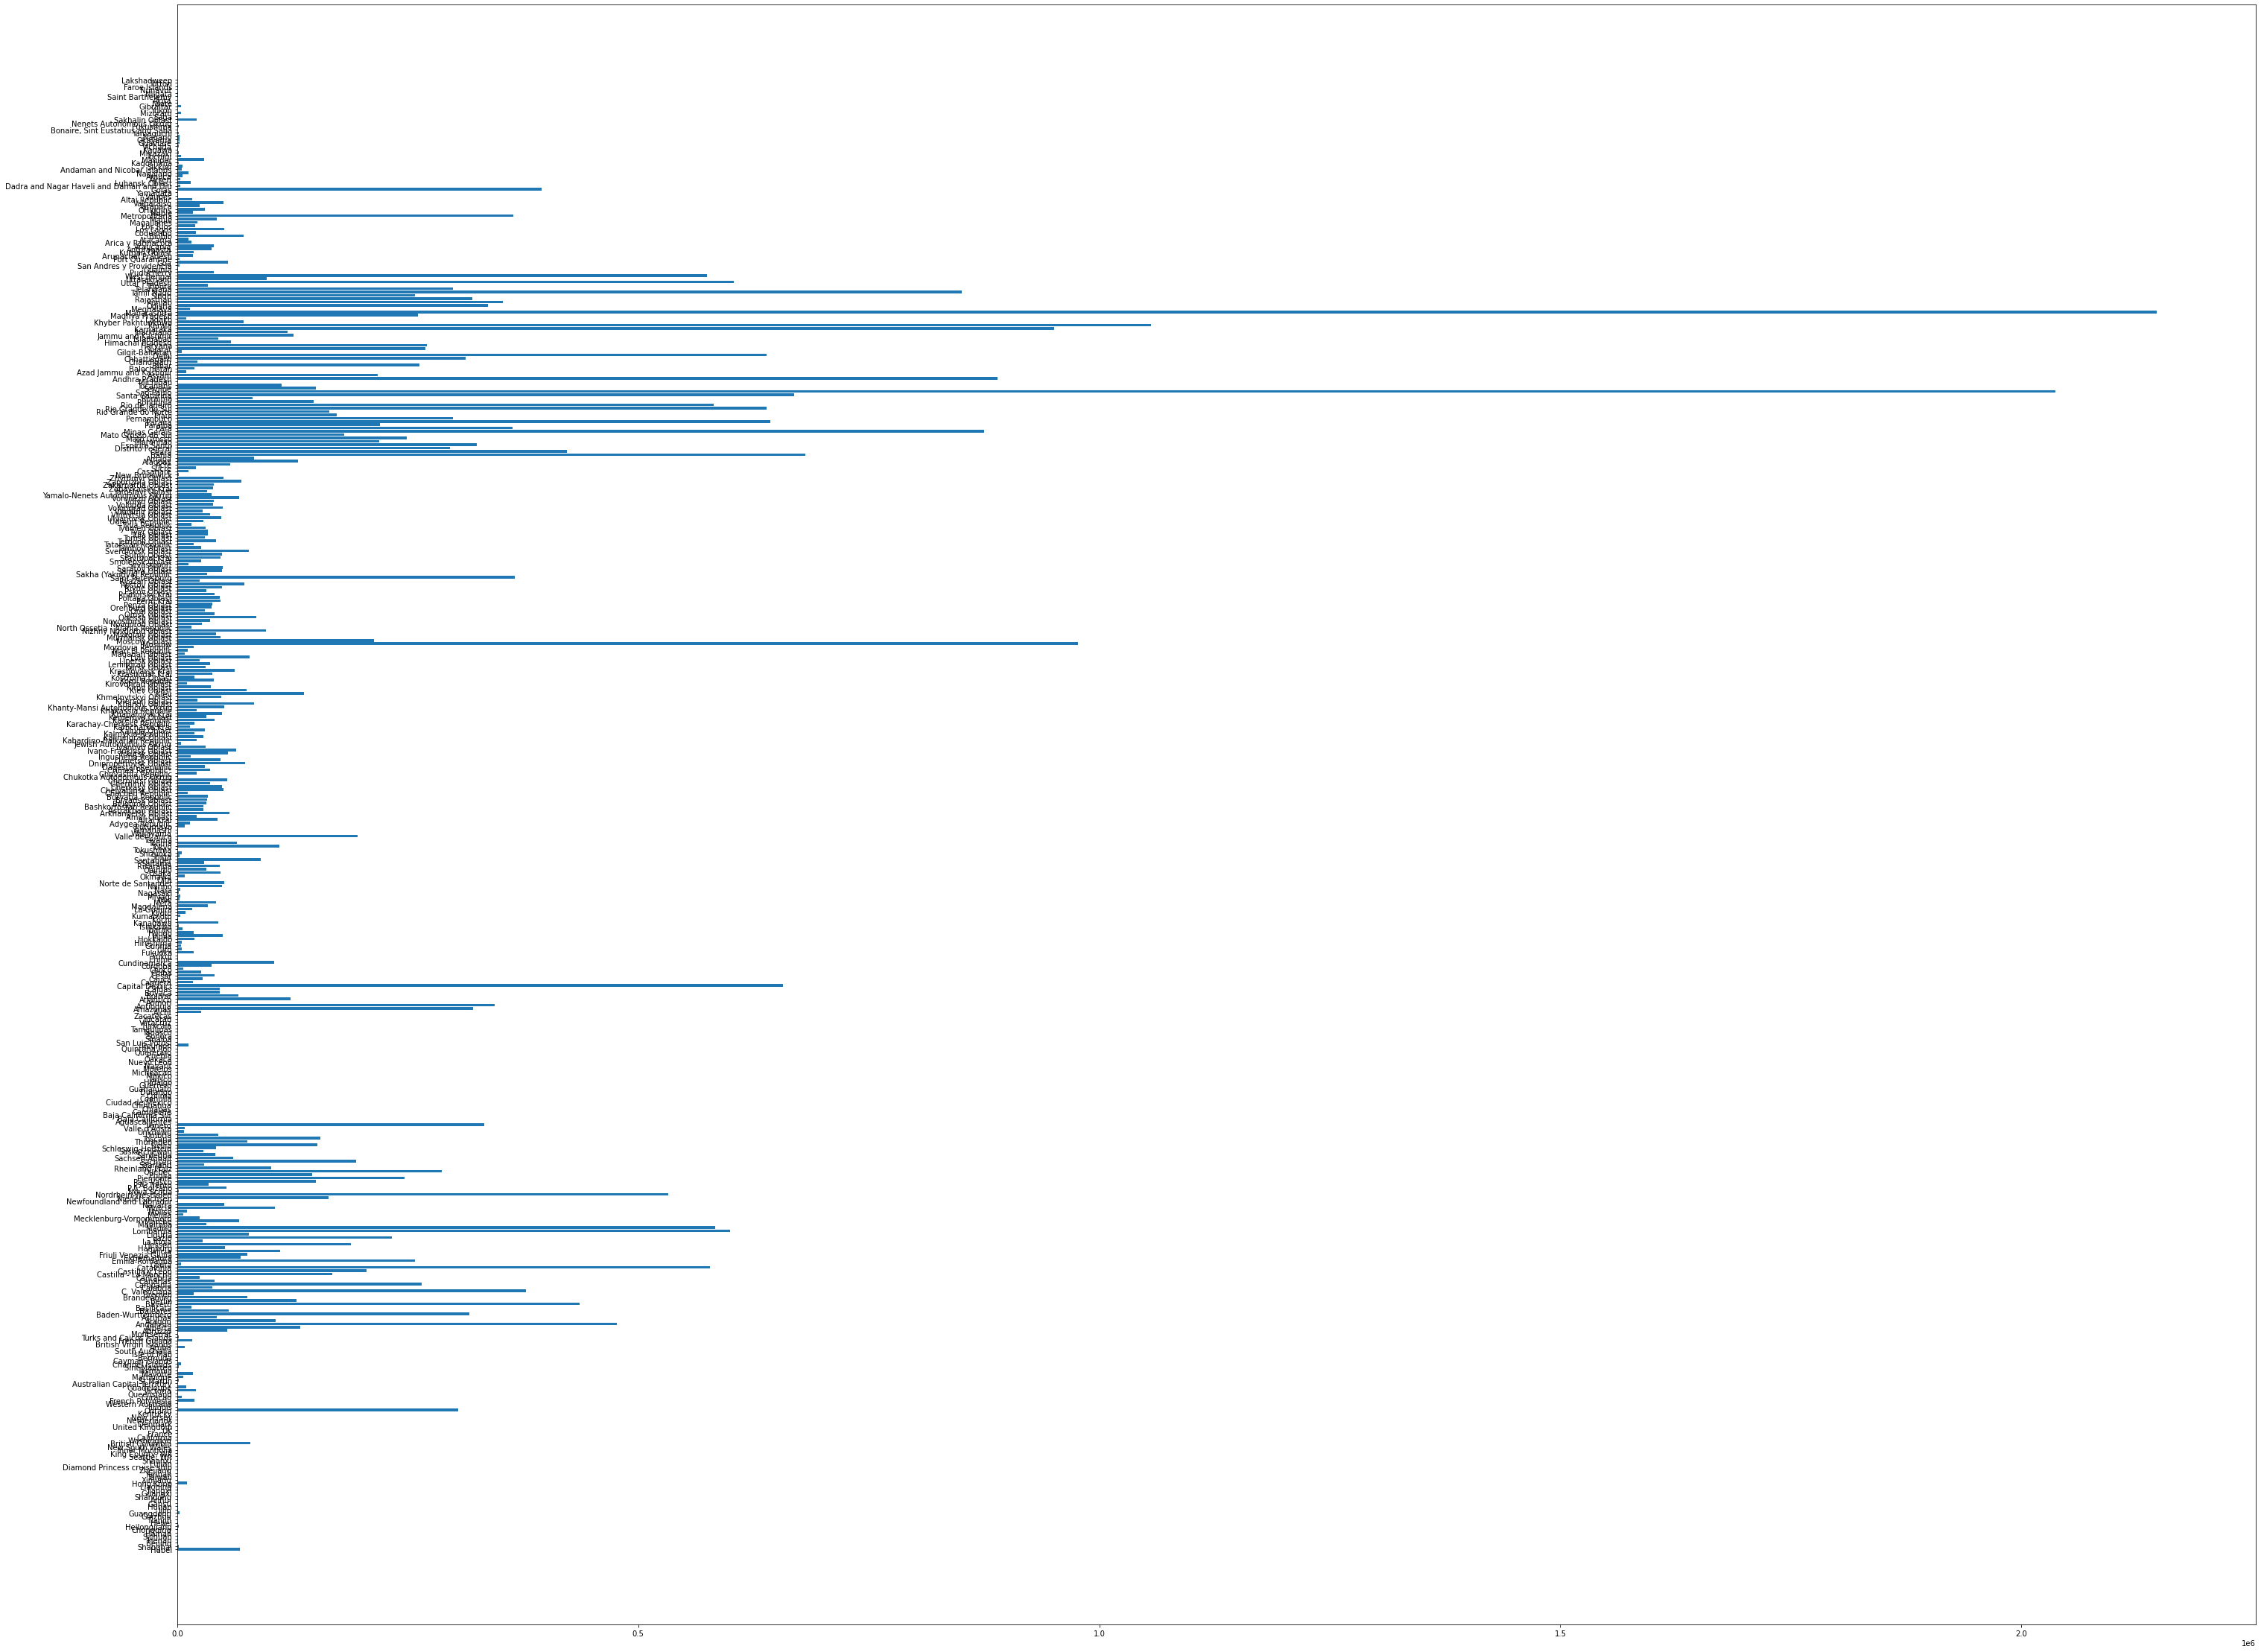

In [28]:
plt.figure(figsize=(50,40))
plt.barh(unique_provinces, province_confirmed_case)
plt.show()

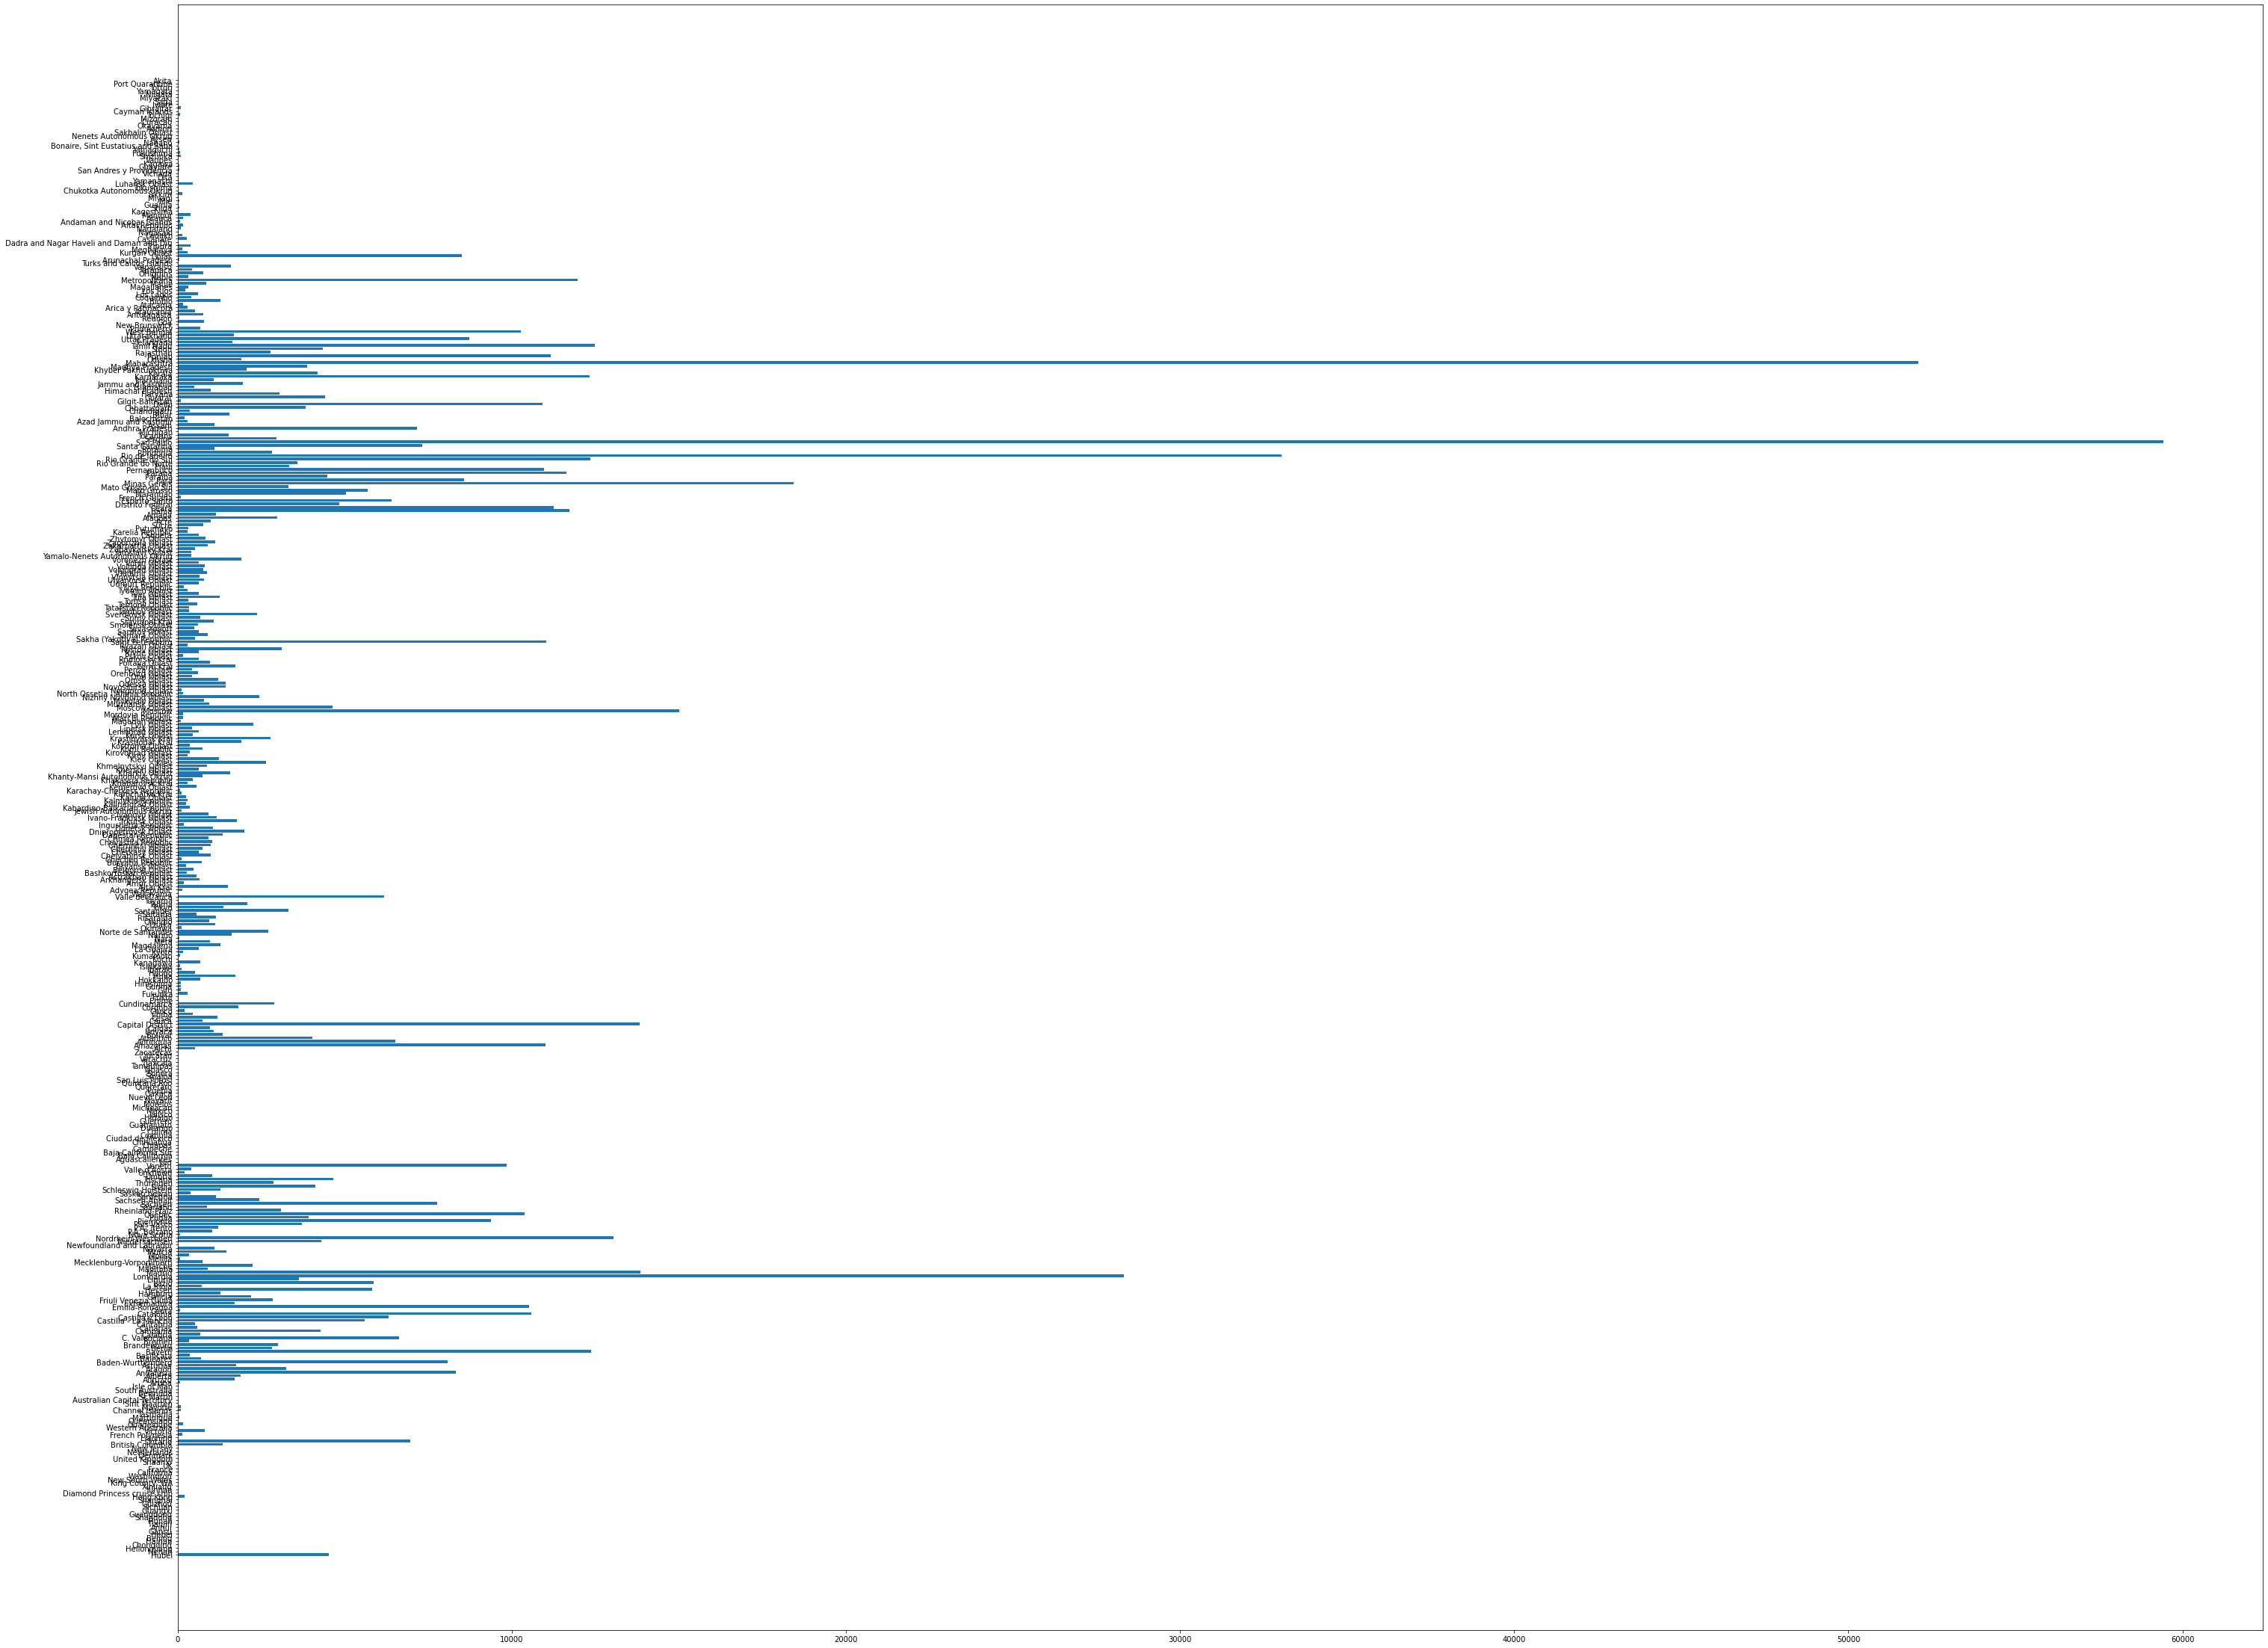

In [29]:
plt.figure(figsize=(50,40))
plt.barh(unique_provinces2, province_deaths_case)
plt.show()

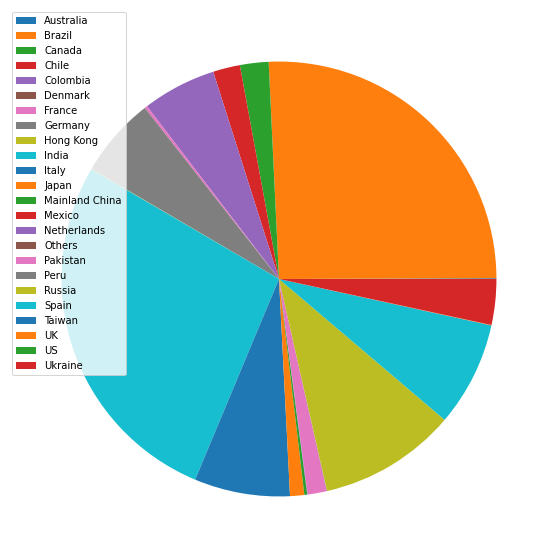

In [30]:
plt.figure(figsize=(10,10))
plt.pie(country_confirmed_case)
plt.legend(unique_countries, loc='best')
plt.show()

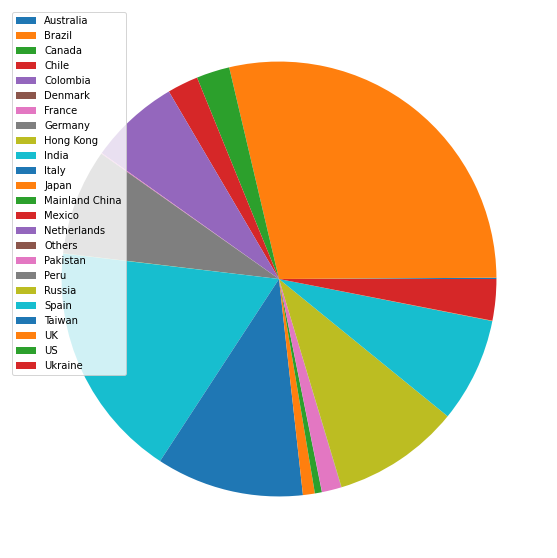

In [31]:
plt.figure(figsize=(10,10))
plt.pie(country_deaths_case)
plt.legend(unique_countries2, loc='best')
plt.show()

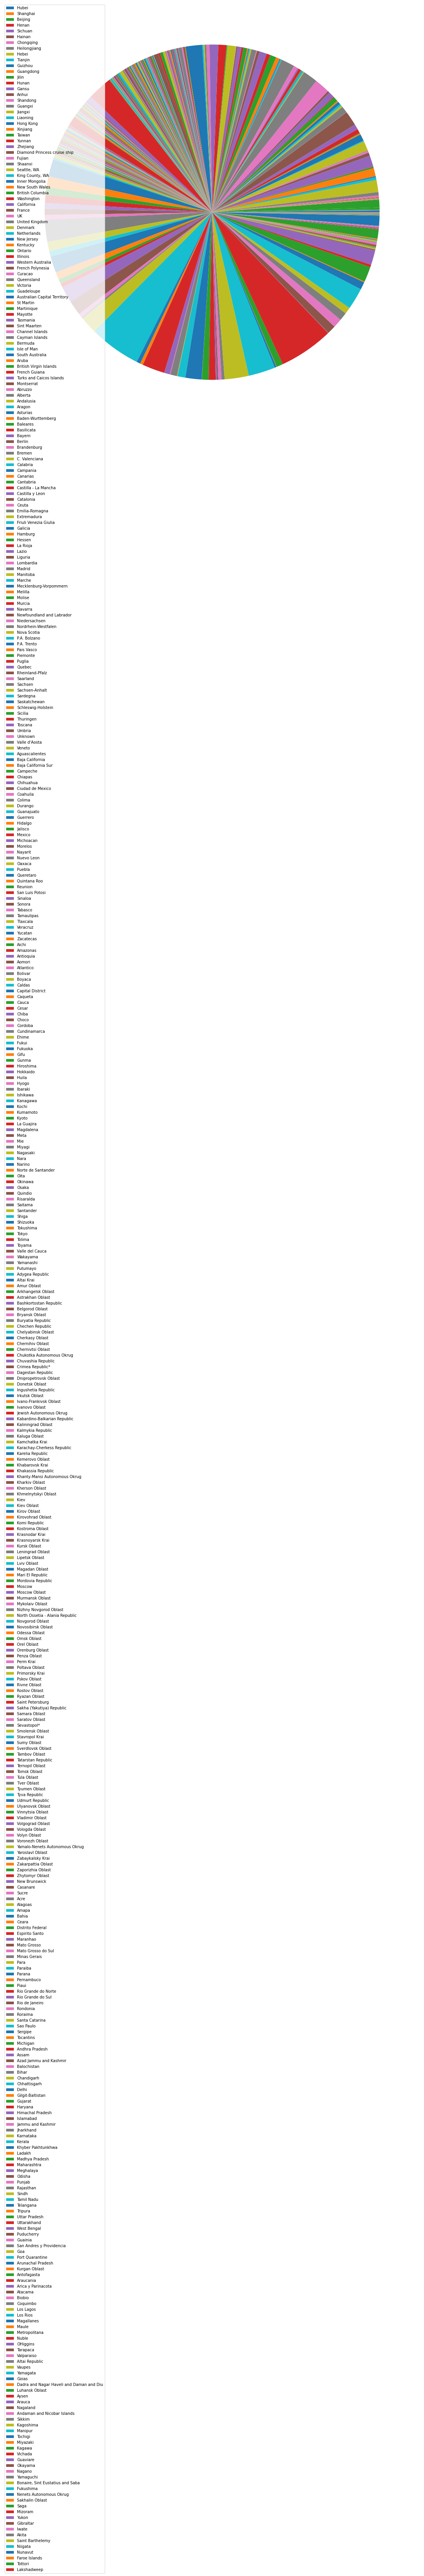

In [32]:
plt.figure(figsize=(20,20))
plt.pie(province_confirmed_case)
plt.legend(unique_provinces, loc='best')
plt.show()

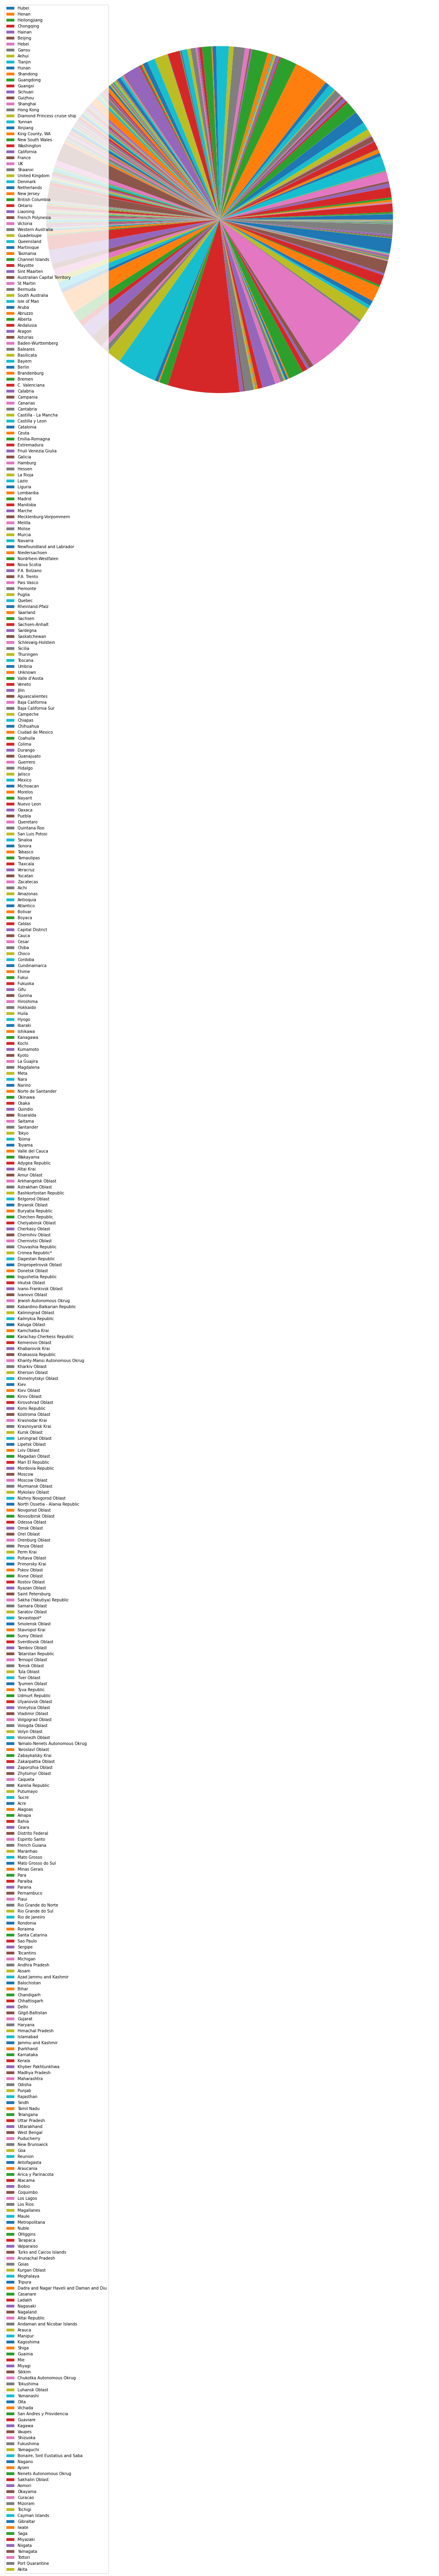

In [33]:
plt.figure(figsize=(20,20))
plt.pie(province_deaths_case)
plt.legend(unique_provinces2, loc='best')
plt.show()